In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [55]:
df1 = pd.read_csv('INFOSYS News.csv', index_col='Date', parse_dates=True)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5756 entries, 2013-01-02 09:47:00 to 2017-12-28 22:08:00
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5756 non-null   int64 
 1   Company     5756 non-null   object
 2   Source      5756 non-null   object
 3   Category    5756 non-null   object
 4   Author      5756 non-null   object
 5   Title       5756 non-null   object
 6   Tags        5756 non-null   object
 7   Subtitle    5755 non-null   object
 8   Content     5756 non-null   object
dtypes: int64(1), object(8)
memory usage: 449.7+ KB


In [57]:
df1.dropna(inplace=True)
df1.drop('Unnamed: 0', axis = 1, inplace=True)

In [58]:
df1['date_only'] = df1.index.date

In [59]:
df1.set_index('date_only', inplace=True)

In [60]:
df1.index.unique()

Index([2013-01-02, 2013-01-03, 2013-01-04, 2013-01-06, 2013-01-07, 2013-01-08,
       2013-01-09, 2013-01-10, 2013-01-11, 2013-01-14,
       ...
       2017-05-10, 2017-05-17, 2017-06-03, 2017-07-16, 2017-08-14, 2017-09-17,
       2017-11-09, 2017-11-18, 2017-11-25, 2017-12-28],
      dtype='object', name='date_only', length=1395)

In [61]:
df1.head(3)

,Company,Source,Category,Author,Title,Tags,Subtitle,Content
date_only,,,,,,,,
2013-01-02,INFOSYS,econominc-times,"['Markets', 'Stocks', 'Earnings']","['ByRanjit Shinde, ET Bureau']",['Stronger rupee to impact IT companies like T...,"['Rupee', 'IT', 'dollar', 'IT services', 'Info...",[],"[""India's topIT servicesexporters are expected..."
2013-01-02,INFOSYS,econominc-times,"['Markets', 'Stocks', 'Earnings']","['ByShilpa Phadnis, TNN']",['Infosys likely to cut revenue guidance'],"['environment', 'insurance', 'Financial Servic...",[],['BANGALORE: The results season is likely to b...
2013-01-03,INFOSYS,econominc-times,"['Markets', 'Stocks', 'News']",['ET Online'],"[""BofA-ML cuts Infosys' earning estimates, tar...","['Infosys', 'Merrill Lynch', 'Bank of America']",[],['MUMBAI: Bank of AmericaMerrill Lynchhas redu...


In [62]:
df1 = df1.groupby(df1.index).apply(lambda x :". ".join(x['Title'])).to_frame()

In [63]:
df1.head(3)

,0
date_only,
2013-01-02,['Stronger rupee to impact IT companies like T...
2013-01-03,"[""BofA-ML cuts Infosys' earning estimates, tar..."
2013-01-04,"['Brokers? call: GMDC, United Breweries and IT..."


In [64]:
df2 = pd.read_csv('INFY.NS.csv', index_col=0, parse_dates=True)

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5368 entries, 2000-01-03 to 2021-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5354 non-null   float64
 1   High       5354 non-null   float64
 2   Low        5354 non-null   float64
 3   Close      5354 non-null   float64
 4   Adj Close  5354 non-null   float64
 5   Volume     5354 non-null   float64
dtypes: float64(6)
memory usage: 293.6 KB


In [66]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5354.000000,5354.000000,5354.000000,5354.000000,5354.000000,5.354000e+03
mean,353.262357,357.509706,348.891815,353.181691,304.811766,1.657948e+07
std,271.358694,274.055689,268.706088,271.339401,268.505718,1.674176e+07
min,33.984375,36.356251,33.049217,34.177341,24.045198,0.000000e+00
25%,136.859375,139.203125,134.375000,136.641407,99.482559,6.664202e+06
50%,298.859375,302.625000,295.568756,298.850006,240.004173,1.025965e+07
75%,500.390633,504.759384,494.468750,499.343750,438.275498,1.983584e+07
max,1474.000000,1477.550049,1430.050049,1446.900024,1446.900024,2.766150e+08


In [67]:
df2.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,122.070313,122.071877,122.070313,122.071877,85.644699,657536.0
2000-01-04,131.250000,131.837891,126.976563,131.686722,92.390434,7191808.0
2000-01-05,122.664063,126.953125,121.151955,121.151955,84.999306,21069440.0


In [68]:
df1.shape

(1394, 1)

In [69]:
df2.shape

(5368, 6)

In [70]:
merge_df = pd.merge(df1, df2, how='inner', left_index=True, right_index=True)

In [71]:
merge_df.head()

,0,Open,High,Low,Close,Adj Close,Volume
2013-01-02,['Stronger rupee to impact IT companies like T...,289.524994,291.000000,287.937500,288.649994,233.854797,4349944.0
2013-01-03,"[""BofA-ML cuts Infosys' earning estimates, tar...",289.375000,293.606262,288.875000,292.237488,236.761337,10599288.0
2013-01-04,"['Brokers? call: GMDC, United Breweries and IT...",293.549988,294.368744,291.500000,293.693756,237.941101,8454008.0
2013-01-07,"['Infosys, Cairn, Maruti Suzuki top investor r...",293.887512,297.487488,291.943756,296.850006,240.498215,8761624.0
2013-01-08,['Infosys Ltd is a ?buy?: Mitesh Thacker']. ['...,295.625000,295.993744,290.437500,293.000000,237.379059,12867424.0


In [72]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1081 entries, 2013-01-02 to 2018-02-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          1081 non-null   object 
 1   Open       1079 non-null   float64
 2   High       1079 non-null   float64
 3   Low        1079 non-null   float64
 4   Close      1079 non-null   float64
 5   Adj Close  1079 non-null   float64
 6   Volume     1079 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [73]:
merge_df.dropna(inplace=True)

In [74]:
merge_df.shape

(1079, 7)

In [75]:
tmp = merge_df[0].iloc[np.random.randint(merge_df.index.shape[0])]
def clean_text(text):
    text = re.sub(r"\b\?s", "'s", text)
    text = re.sub(r"\\+", "", text)
    text = re.sub(r"\"", "", text)
    text = re.sub(r"\'?(\[|\])\'?", "", text)
    return text

print(clean_text(tmp))


Macro data, Infosys & TCS Q3 nos to keep investors busy next wk


In [76]:
merge_df[0] = merge_df[0].apply(clean_text)

In [77]:
merge_df.iloc[4][0]

'Infosys Ltd is a ?buy?: Mitesh Thacker. Infosys valuations trail TCS, Wipro, HCL Technologies. Infosys stock will depend on Q3 earnings. Revenue growth of TCS, Infosys, Wipro, HCL to remain modest: Analysts'

 ### [Sentiment Analyzer](https://www.kaggle.com/hassanamin/unsupervised-sentiment-analysis-using-vader)

In [25]:
# import nltk
# nltk.download('vader_lexicon')

In [26]:
analyser = SentimentIntensityAnalyzer()

In [27]:
analyser.polarity_scores(merge_df.iloc[4][0])

{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compound': 0.4515}

In [28]:
merge_df['scores'] = merge_df[0].apply(analyser.polarity_scores)
merge_df = pd.concat([merge_df.drop(['scores', 0], axis=1), merge_df['scores'].apply(pd.Series)], axis=1)

In [29]:
merge_df.head()

,Open,High,Low,Close,Adj Close,Volume,neg,neu,pos,compound
2013-01-02,289.524994,291.000000,287.937500,288.649994,233.854797,4349944.0,0.071,0.572,0.357,0.8176
2013-01-03,289.375000,293.606262,288.875000,292.237488,236.761337,10599288.0,0.076,0.825,0.100,0.1779
2013-01-04,293.549988,294.368744,291.500000,293.693756,237.941101,8454008.0,0.064,0.796,0.141,0.4404
2013-01-07,293.887512,297.487488,291.943756,296.850006,240.498215,8761624.0,0.000,0.907,0.093,0.5106
2013-01-08,295.625000,295.993744,290.437500,293.000000,237.379059,12867424.0,0.000,0.910,0.090,0.4515


In [30]:
merge_df.describe()

,Open,High,Low,Close,Adj Close,Volume,neg,neu,pos,compound
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1.079000e+03,1079.000000,1079.000000,1079.000000,1079.000000
mean,479.211637,484.118506,473.942858,478.998547,410.424332,9.340225e+06,0.038255,0.839089,0.122647,0.324001
std,77.425601,78.230387,76.251665,77.274593,73.112385,1.039478e+07,0.064559,0.119690,0.106299,0.443357
min,275.750000,279.725006,273.250000,276.500000,224.011276,0.000000e+00,0.000000,0.435000,0.000000,-0.940900
25%,430.318756,434.812500,427.428131,431.787506,356.004318,5.407391e+06,0.000000,0.761000,0.000000,0.000000
50%,489.649994,493.750000,483.524994,488.750000,425.422699,7.117466e+06,0.000000,0.844000,0.112000,0.361200
75%,536.937500,541.537506,529.750000,536.250000,462.128112,9.973569e+06,0.063000,0.927000,0.189000,0.726900
max,633.500000,639.650024,630.025024,633.799988,546.905090,1.663204e+08,0.515000,1.000000,0.565000,0.998200


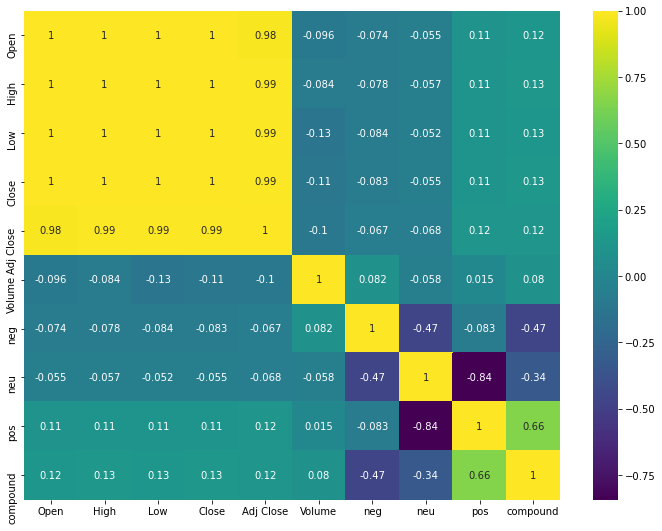

In [31]:
plt.figure(figsize = (12,9))
sns.heatmap(merge_df.corr(),cmap='viridis', annot=True)

##### News sentiment doesnt show any correlation with stock data. Whatever! making stupid decisions is always in me.

##### Considering Compound value only

In [32]:
merge_df.shape

(1079, 10)

In [33]:
def series_data(df, series_len):
    X_close = []
    X_open = []
    X_compound = []
    X_volume = []
    y = []
    for i in range(len(df) - series_len):
        opn = df.iloc[i:(i + series_len), 0]
        close = df.iloc[i:(i + series_len), 4]
        compound = df.iloc[i:(i + series_len), 9]
        volume = df.iloc[i:(i + series_len), 5]
        target = df.iloc[(i + series_len), 4]
        X_close.append(close)
        X_open.append(opn)
        X_compound.append(compound)
        X_volume.append(volume)
        y.append(target)
    return np.hstack((X_open, X_close, X_volume, X_compound)), np.array(y).reshape(-1, 1)

In [34]:
merge_df.head(5)

,Open,High,Low,Close,Adj Close,Volume,neg,neu,pos,compound
2013-01-02,289.524994,291.000000,287.937500,288.649994,233.854797,4349944.0,0.071,0.572,0.357,0.8176
2013-01-03,289.375000,293.606262,288.875000,292.237488,236.761337,10599288.0,0.076,0.825,0.100,0.1779
2013-01-04,293.549988,294.368744,291.500000,293.693756,237.941101,8454008.0,0.064,0.796,0.141,0.4404
2013-01-07,293.887512,297.487488,291.943756,296.850006,240.498215,8761624.0,0.000,0.907,0.093,0.5106
2013-01-08,295.625000,295.993744,290.437500,293.000000,237.379059,12867424.0,0.000,0.910,0.090,0.4515


In [35]:
X, y= series_data(merge_df, series_len=3)#data series for 3days

In [79]:
pip show pandas

Name: pandasNote: you may need to restart the kernel to use updated packages.
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\prana\anaconda3\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: statsmodels, seaborn, mplfinance



In [36]:
X[0]

array([2.89524994e+02, 2.89375000e+02, 2.93549988e+02, 2.33854797e+02,
       2.36761337e+02, 2.37941101e+02, 4.34994400e+06, 1.05992880e+07,
       8.45400800e+06, 8.17600000e-01, 1.77900000e-01, 4.40400000e-01])

In [37]:
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

### Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)


In [40]:
X_train[:5]

array([[0.03850453, 0.03808526, 0.04975538, 0.03048532, 0.03948685,
        0.04314058, 0.026154  , 0.06372813, 0.05082965, 0.90686401,
        0.5769687 , 0.71234078],
       [0.03808526, 0.04975538, 0.05069885, 0.03948685, 0.04314058,
        0.05105994, 0.06372813, 0.05082965, 0.05267919, 0.5769687 ,
        0.71234078, 0.74854314],
       [0.04975538, 0.05069885, 0.05555556, 0.04314058, 0.05105994,
        0.04139994, 0.05082965, 0.05267919, 0.07736527, 0.71234078,
        0.74854314, 0.71806508],
       [0.05069885, 0.05555556, 0.04689027, 0.05105994, 0.04139994,
        0.03732261, 0.05267919, 0.07736527, 0.03697663, 0.74854314,
        0.71806508, 0.7310608 ],
       [0.05555556, 0.04689027, 0.04367575, 0.04139994, 0.03732261,
        0.03459421, 0.07736527, 0.03697663, 0.06554226, 0.71806508,
        0.7310608 , 0.39348151]])

In [41]:
y_train[:5].ravel()

array([0.05105994, 0.04139994, 0.03732261, 0.03459421, 0.15684904])

# XGB

In [47]:
from xgboost import XGBRegressor

In [48]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

In [49]:
model.fit(X_train, y_train.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
prediction = model.predict(X_test)

In [51]:
def RMSE(real, pred):
    print('RMSE:', np.sqrt(tf.keras.metrics.mean_squared_error(real.ravel(), pred.ravel())))

In [52]:
def pred_vs_real_plot(pred, real):
    plt.figure(figsize=(12,6))
    x_axis = np.arange(len(pred))
    sns.lineplot(x_axis, pred, label='Predicted')
    sns.lineplot(x_axis, real, label='True')

In [53]:
RMSE(y_test, prediction)

RMSE: 0.051307227


/opt/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


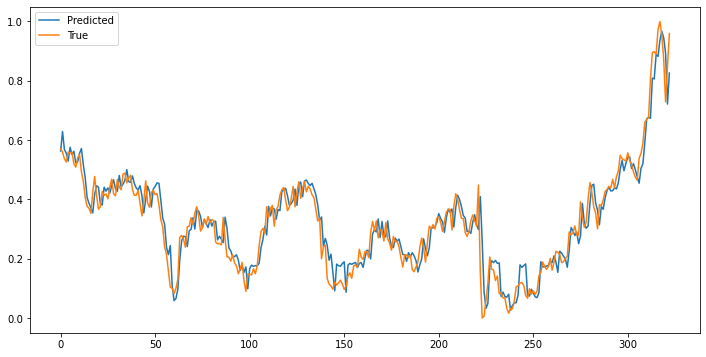

In [60]:
pred_vs_real_plot(prediction, y_test.ravel())

# LSTM

In [61]:
def create_LSTM(dropout):
    model = Sequential()
    neurons = 12 # 4 features x 3 days
    
    model.add(LSTM(units=neurons,
        return_sequences=True,
        input_shape=(X_train.shape[1], 1)))

    model.add(Dropout(dropout))
    model.add(LSTM(units=neurons, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=neurons))
    model.add(Dropout(dropout))

    model.add(Dense(1))
    return model

In [62]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [63]:
model = create_LSTM(0.2)
model.compile(optimizer="adam", loss="mse")

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 12)            672       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 12)            1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 12)                1200      
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [65]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [66]:
model.fit(X_train, y_train, epochs=20, shuffle=False, callbacks=[es])

Epoch 1/20
24/24 [==============================] - 3s 10ms/step - loss: 0.1299
Epoch 2/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0460
Epoch 3/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0507
Epoch 4/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0373
Epoch 5/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0292
Epoch 6/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 7/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 8/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 9/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 10/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 11/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 12/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 13/20
24/24 [============================

In [67]:
predictions = model.predict(X_test)

In [68]:
predicted_prices = y_test_scaler.inverse_transform(predictions).ravel()
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

In [70]:
RMSE(real_prices, predicted_prices)

RMSE: 10.960277


/opt/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


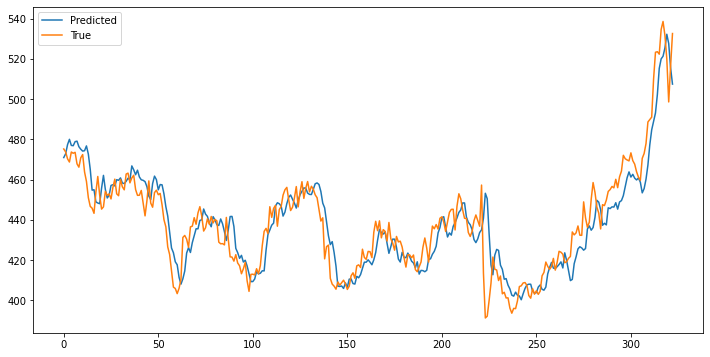

In [71]:
pred_vs_real_plot(predicted_prices, real_prices)